In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

Stacked LSTM

In [2]:
file_path = (r'C:\Users\begba\Desktop\praktika-master\PIB.xlsx')
data = pd.read_excel(file_path)

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [5]:
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [6]:
time_steps = 1
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)


In [7]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, time_steps)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')



In [10]:
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
14/14 - 9s - loss: 0.1887 - 9s/epoch - 636ms/step
Epoch 2/100
14/14 - 0s - loss: 0.1467 - 88ms/epoch - 6ms/step
Epoch 3/100
14/14 - 0s - loss: 0.1053 - 81ms/epoch - 6ms/step
Epoch 4/100
14/14 - 0s - loss: 0.0662 - 77ms/epoch - 6ms/step
Epoch 5/100
14/14 - 0s - loss: 0.0463 - 86ms/epoch - 6ms/step
Epoch 6/100
14/14 - 0s - loss: 0.0355 - 135ms/epoch - 10ms/step
Epoch 7/100
14/14 - 0s - loss: 0.0331 - 71ms/epoch - 5ms/step
Epoch 8/100
14/14 - 0s - loss: 0.0309 - 71ms/epoch - 5ms/step
Epoch 9/100
14/14 - 0s - loss: 0.0276 - 85ms/epoch - 6ms/step
Epoch 10/100
14/14 - 0s - loss: 0.0253 - 79ms/epoch - 6ms/step
Epoch 11/100
14/14 - 0s - loss: 0.0227 - 67ms/epoch - 5ms/step
Epoch 12/100
14/14 - 0s - loss: 0.0202 - 83ms/epoch - 6ms/step
Epoch 13/100
14/14 - 0s - loss: 0.0184 - 73ms/epoch - 5ms/step
Epoch 14/100
14/14 - 0s - loss: 0.0168 - 80ms/epoch - 6ms/step
Epoch 15/100
14/14 - 0s - loss: 0.0153 - 82ms/epoch - 6ms/step
Epoch 16/100
14/14 - 0s - loss: 0.0146 - 76ms/epoch - 5ms/step

In [11]:
# predictions array with shape (2,1)
predictions = np.array([[1], [2]])

expanded_predictions = np.repeat(predictions, 3, axis=1)

# Now, expanded_predictions has shape (2, 3), which matches the expected input shape for the scaler.
try:
    inverse_transformed_predictions = scaler.inverse_transform(expanded_predictions)
    print(inverse_transformed_predictions)
except Exception as e:
    print(f"Error during inverse transformation: {e}")


[[2.023000e+03 4.000000e+00 4.159069e+05]
 [2.027000e+03 7.000000e+00 5.917351e+05]]


Vanilla LSTM

In [13]:
data.head()

,Anul,Trimestrul,PIB
0,2019,1,252368.6
1,2019,2,262370.8
2,2019,3,267966.3
3,2019,4,276961.0
4,2020,1,272031.8


In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['PIB'] = scaler.fit_transform(data[['PIB']])

In [15]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 3
X, y = create_sequences(data['PIB'].values, sequence_length)


In [16]:
print("Shape of X before reshaping:", X.shape)


if len(X.shape) == 2:
    X = X.reshape((X.shape[0], X.shape[1], 1))

print("Shape of X after reshaping:", X.shape)


model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


Shape of X before reshaping: (17, 3)
Shape of X after reshaping: (17, 3, 1)


In [17]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [18]:
history = model.fit(X, y, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
17/17 - 4s - loss: 0.1996 - 4s/epoch - 211ms/step
Epoch 2/100
17/17 - 0s - loss: 0.0827 - 83ms/epoch - 5ms/step
Epoch 3/100
17/17 - 0s - loss: 0.0272 - 80ms/epoch - 5ms/step
Epoch 4/100
17/17 - 0s - loss: 0.0224 - 82ms/epoch - 5ms/step
Epoch 5/100
17/17 - 0s - loss: 0.0179 - 86ms/epoch - 5ms/step
Epoch 6/100
17/17 - 0s - loss: 0.0165 - 77ms/epoch - 5ms/step
Epoch 7/100
17/17 - 0s - loss: 0.0131 - 87ms/epoch - 5ms/step
Epoch 8/100
17/17 - 0s - loss: 0.0113 - 81ms/epoch - 5ms/step
Epoch 9/100
17/17 - 0s - loss: 0.0097 - 88ms/epoch - 5ms/step
Epoch 10/100
17/17 - 0s - loss: 0.0094 - 79ms/epoch - 5ms/step
Epoch 11/100
17/17 - 0s - loss: 0.0082 - 88ms/epoch - 5ms/step
Epoch 12/100
17/17 - 0s - loss: 0.0080 - 81ms/epoch - 5ms/step
Epoch 13/100
17/17 - 0s - loss: 0.0075 - 81ms/epoch - 5ms/step
Epoch 14/100
17/17 - 0s - loss: 0.0073 - 82ms/epoch - 5ms/step
Epoch 15/100
17/17 - 0s - loss: 0.0075 - 80ms/epoch - 5ms/step
Epoch 16/100
17/17 - 0s - loss: 0.0074 - 80ms/epoch - 5ms/step
E

In [19]:
# Make predictions
predictions = model.predict(X)
predictions_inverse = scaler.inverse_transform(predictions)
y_inverse = scaler.inverse_transform(y.reshape(-1, 1))

1/1 [==============================] - 1s 971ms/step


In [20]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_inverse, predictions_inverse))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 13474.31446350236


Bidirectional LSTM

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
import matplotlib.pyplot as plt
from keras.models import load_model
from numpy import array

In [22]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        #find the end of this pattern
        end_ix = i + n_steps
        #check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
            #gather input and output parts of the pattern
            seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
            X.append(seq_x)
            y.append(seq_y)
            return array(X), array(y)


In [23]:
#define input sequence
raw_sequence = data['PIB'].tolist()


In [24]:
n_steps = 3

In [25]:
n_features = 1

In [26]:

# Adjust the input_shape parameter to match data's shape
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(3, 1)),  # Adjusted to (3, 1)
    LSTM(units=50),
    Dense(1)
])

# Compile model as before
model.compile(optimizer='adam', loss='mse')

In [27]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.3144
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.3008
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2874
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2743
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2613
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2483
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 0.2353
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2223
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2091
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.1959
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 0.1826
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1691
Epoch 13/100
1/1 [==============================] -

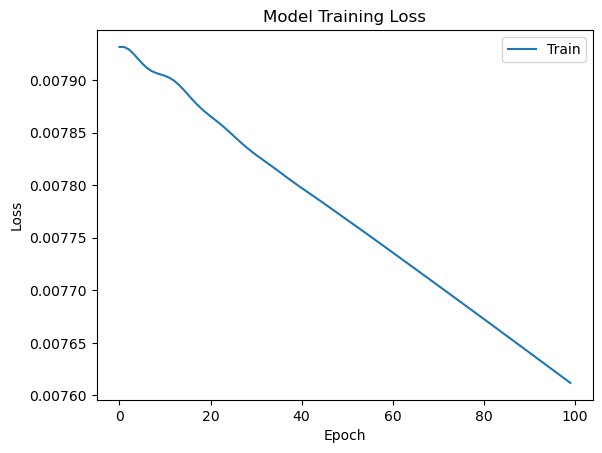

In [28]:
# Assuming 'history' is the History object returned by model.fit()
history = model.fit(X, y, epochs=100, verbose=0)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


In [29]:
last_pib_values = array([391468.3, 402454.9, 415906.9])

In [30]:
n_steps = 3  # Number of time steps your model was trained on
n_features = 1  # Number of features per time step (univariate means 1)
x_input = last_pib_values.reshape((1, n_steps, n_features))


In [31]:
yhat = model.predict(x_input, verbose=0)

In [32]:
print(yhat)

[[4.800913]]


CNN LSTM

In [33]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from numpy import array

In [34]:
sequence = data['PIB'].values

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
sequence = scaler.fit_transform(sequence.reshape(-1, 1)).flatten()

In [36]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [37]:
n_steps = 4  # Timesteps per sample
X, y = split_sequence(sequence, n_steps)

In [38]:
n_features = 1  # Features per step (univariate)
n_seq = 2  # Number of subsequences
n_steps = 2  # Steps per subsequence
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [39]:
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [40]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.3254
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3150
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 0.3053
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2962
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2875
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2790
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2708
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2629
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2554
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2480
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2407
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2332
Epoch 13/100
1/1 [==============================] -

In [41]:
x_input = sequence[-4:]  # Last four entries from the sequence
x_input = scaler.transform(x_input.reshape(-1, 1)).flatten()  # Normalize input
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1.0792195]]


ConvLSTM

In [42]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from numpy import array

In [43]:
sequence = data['PIB'].values

In [44]:
scaler = MinMaxScaler(feature_range=(0, 1))
sequence = scaler.fit_transform(sequence.reshape(-1, 1)).flatten() 

In [45]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [46]:
n_steps = 4  # Timesteps per sample
X, y = split_sequence(sequence, n_steps)

In [47]:
n_features = 1  # Features per step (univariate)
n_seq = 2  # Number of subsequences
n_steps = 2  # Steps per subsequence
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [48]:
model = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)),
    Flatten(),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [49]:
model.fit(X, y, epochs=100, verbose=1) 

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.3295
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 0.3236
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3178
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3122
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 0.3067
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3013
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.2960
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2910
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 0.2860
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 0.2812
Epoch 11/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2764
Epoch 12/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2718
Epoch 13/100
1/1 [==============================] -

In [51]:
x_input = sequence[-4:]  # Last four entries from the sequence
x_input = scaler.transform(x_input.reshape(-1, 1)).flatten()  # Normalize input
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.9882692]]


In [52]:
# Assuming 'scaler' is your MinMaxScaler instance and 'yhat' is your prediction
yhat_original = scaler.inverse_transform(yhat)
print("Predicted GDP value:", yhat_original)


Predicted GDP value: [[0.9882692]]


Multiple Input Series

In [58]:
import pandas as pd
import numpy as np
from numpy import array, hstack

In [59]:
data = pd.read_excel(r'C:\Users\begba\Desktop\praktika-master\PIB_Updated.xlsx')

In [60]:
print(data)

    Anul  Trimestrul       PIB  Rata angajare  Cheltuielile_totale
0   2019           1  252368.6        7892464              2347.00
1   2019           2  262370.8        8142162              2413.05
2   2019           3  267966.3        8154113              2570.57
3   2019           4  276961.0        8054722              2655.71
4   2020           1  272031.8        7954253              2551.13
5   2020           2  240078.7        7859102              2439.02
6   2020           3  265918.1        7978700              2680.12
7   2020           4  286616.6        7967302              2813.78
8   2021           1  283317.9        7300644              2813.30
9   2021           2  289048.2        7520145              2848.76
10  2021           3  299379.8        7510097              3045.97
11  2021           4  313454.7        7486105              3206.41
12  2022           1  331114.2        7439170              3267.71
13  2022           2  346335.5        7608656              330

In [61]:
in_seq1 = data['Rata angajare'].values
in_seq2 = data['Cheltuielile_totale'].values
out_seq = data['PIB'].values

In [63]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))


In [64]:
dataset = hstack((in_seq1, in_seq2, out_seq))

In [65]:
n_steps = 3

In [66]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # Find the end of this pattern
        end_ix = i + n_steps
        # Check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # Gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [67]:
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

(18, 3, 2) (18,)


In [68]:
for i in range(len(X)):
    print(X[i], y[i])

[[7.892464e+06 2.347000e+03]
 [8.142162e+06 2.413050e+03]
 [8.154113e+06 2.570570e+03]] 267966.3
[[8.142162e+06 2.413050e+03]
 [8.154113e+06 2.570570e+03]
 [8.054722e+06 2.655710e+03]] 276961.0
[[8.154113e+06 2.570570e+03]
 [8.054722e+06 2.655710e+03]
 [7.954253e+06 2.551130e+03]] 272031.8
[[8.054722e+06 2.655710e+03]
 [7.954253e+06 2.551130e+03]
 [7.859102e+06 2.439020e+03]] 240078.7
[[7.954253e+06 2.551130e+03]
 [7.859102e+06 2.439020e+03]
 [7.978700e+06 2.680120e+03]] 265918.1
[[7.859102e+06 2.439020e+03]
 [7.978700e+06 2.680120e+03]
 [7.967302e+06 2.813780e+03]] 286616.6
[[7.978700e+06 2.680120e+03]
 [7.967302e+06 2.813780e+03]
 [7.300644e+06 2.813300e+03]] 283317.9
[[7.967302e+06 2.813780e+03]
 [7.300644e+06 2.813300e+03]
 [7.520145e+06 2.848760e+03]] 289048.2
[[7.300644e+06 2.813300e+03]
 [7.520145e+06 2.848760e+03]
 [7.510097e+06 3.045970e+03]] 299379.8
[[7.520145e+06 2.848760e+03]
 [7.510097e+06 3.045970e+03]
 [7.486105e+06 3.206410e+03]] 313454.7
[[7.510097e+06 3.045970e+03]
 

In [69]:
print(data.head())

   Anul  Trimestrul       PIB  Rata angajare  Cheltuielile_totale
0  2019           1  252368.6        7892464              2347.00
1  2019           2  262370.8        8142162              2413.05
2  2019           3  267966.3        8154113              2570.57
3  2019           4  276961.0        8054722              2655.71
4  2020           1  272031.8        7954253              2551.13


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [71]:
print(data.columns)


Index(['Anul', 'Trimestrul', 'PIB', 'Rata angajare', 'Cheltuielile_totale'], dtype='object')


In [72]:
X = data[['Rata angajare', 'Cheltuielile_totale']] 
y = data['PIB']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_pred = model.predict(X_test)

In [76]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [77]:
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 7580.220999999947
Root Mean Squared Error: 8953.360579273027


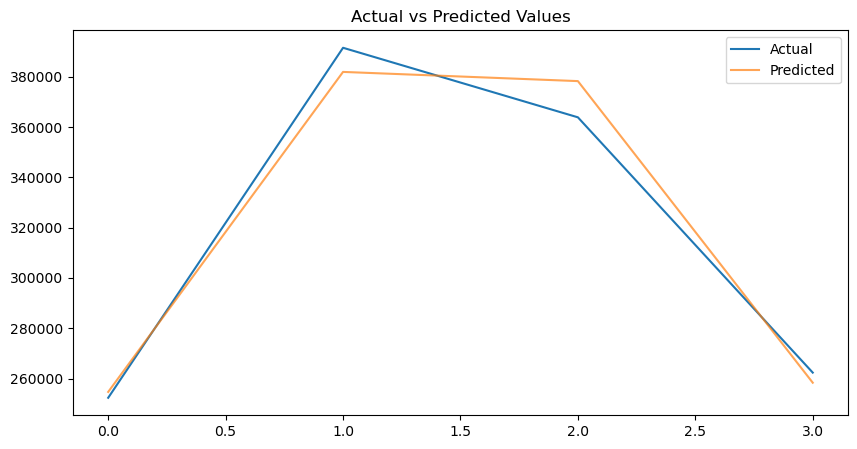

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()